<a href="https://colab.research.google.com/github/Kulpreet-prog/NIELIT-FSK-PRIME-April21/blob/main/Task_4__Introduction_to_Deep_Learning_%E2%80%93_AI_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 4: Introduction to Deep Learning with TensorFlow & Keras

## Section 1: Setup & Dataset

### **Task 1**: Import Dependencies and Load Data
*Instruction*: Use the MNIST dataset (handwritten digit classification). Load it from tf.keras.datasets and normalize the pixel values.

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0




## Section 2: Data Exploration

### **Task 2**: Visualize Sample Images

*Instruction*: Plot the first 10 images with their corresponding labels.


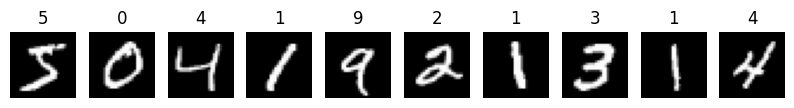

In [7]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(10, 2))

# Plot first 10 images
for i in range(10):
    plt.subplot(1, 10, i + 1)  # (rows, columns, index)
    plt.imshow(X_train[i], cmap='gray')  # Show the image in grayscale
    plt.title(y_train[i])
    plt.axis('off')  # Hide axes for cleaner look

plt.show()


## Section 3: Build a Neural Network

### **Task 3**: Define a Simple MLP Model

*Instruction*: Use Keras to create a simple feedforward neural network with:


*   Input layer (flatten)
*   2 hidden layers (128, 64 neurons) with ReLU
*   Output layer with softmax


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),        # Input layer: Flatten 28x28 images
    Dense(128, activation='relu'),         # Hidden layer 1: 128 neurons, ReLU activation
    Dense(64, activation='relu'),          # Hidden layer 2: 64 neurons, ReLU activation
    Dense(10, activation='softmax')        # Output layer: 10 neurons (for digits 0-9), Softmax activation
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Section 4: Compile & Train

### **Task 4**: Compile and Fit the Model

*Instruction*: Compile using `adam` optimizer and `sparse_categorical_crossentropy` as loss function. Train for 10 epochs.

In [9]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train (fit) the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8738 - loss: 0.4283 - val_accuracy: 0.9536 - val_loss: 0.1485
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9674 - loss: 0.1053 - val_accuracy: 0.9689 - val_loss: 0.0937
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9787 - loss: 0.0678 - val_accuracy: 0.9689 - val_loss: 0.1042
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9830 - loss: 0.0527 - val_accuracy: 0.9756 - val_loss: 0.0849
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9878 - loss: 0.0389 - val_accuracy: 0.9714 - val_loss: 0.0996
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.9760 - val_loss: 0.0924
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9915 - loss: 0.0258 - val_accuracy: 0.9756 - val_loss: 0.0844
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9936 - loss: 0.0210

## Section 5: Evaluate the Model

### **Task 5**:  Test Accuracy and Confusion Matrix

*Instruction*: Evaluate the model on the test set and print confusion matrix.


313/313 - 1s - 2ms/step - accuracy: 0.9774 - loss: 0.0991
Test accuracy: 0.9774
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


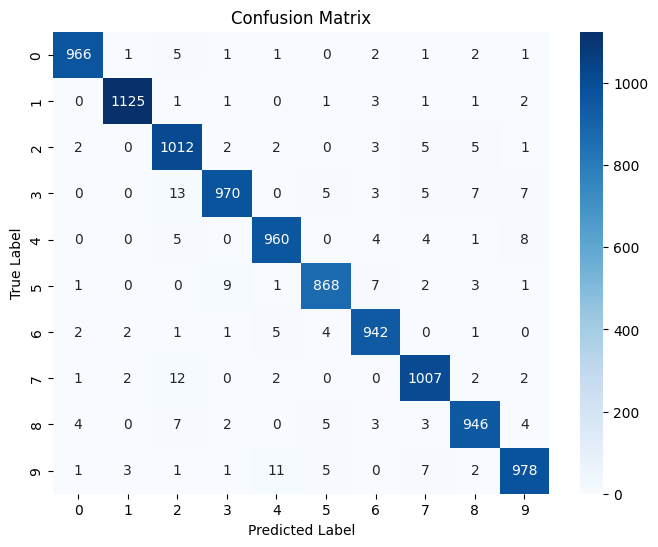

In [10]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

# Predict classes for the test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Import confusion matrix tools
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Section 6: Plot Training History

### **Task 6**: Visualize Accuracy and Loss

*Instruction*: Plot training vs validation accuracy and loss over epochs.

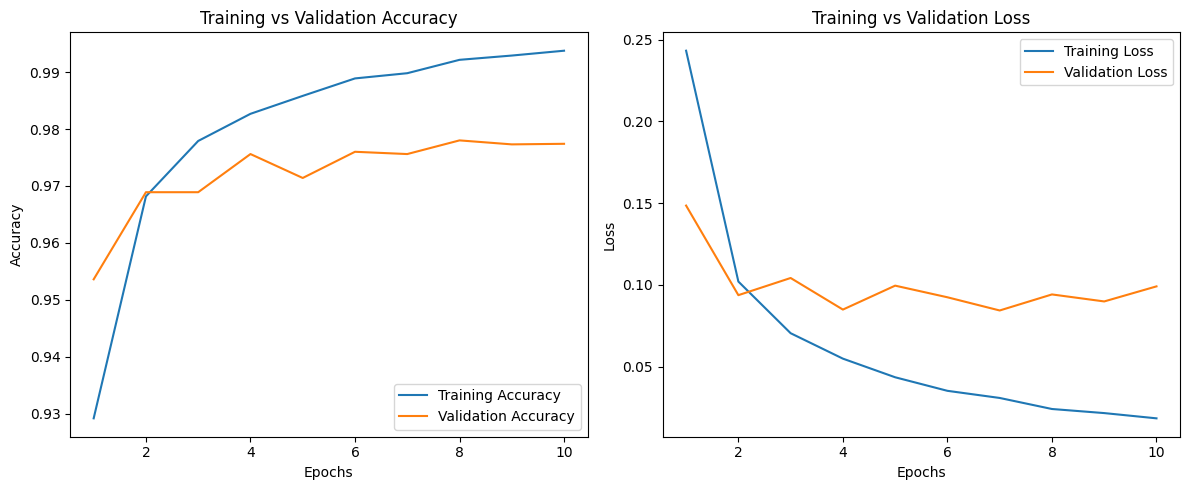

In [11]:
import matplotlib.pyplot as plt

# Get training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()
